# Modelo Auto Regressivo Média Móvel

Utilizando modelo ARMA para modelar a série temporal

Utilizaremos uma série temporal da temperatura na cidade australiana de Melbourne

* Importando biblitecas

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

* Lendo arquivo CSV

In [10]:
dados = pd.read_csv('daily-min-temperatures.csv')

Exibindo cinco primeiras linhas

In [11]:
dados.head()

Date  Temp
0  1981-01-01  20.7
1  1981-01-02  17.9
2  1981-01-03  18.8
3  1981-01-04  14.6
4  1981-01-05  15.8

* Definindo data como índice

In [12]:
dados['Date'] = pd.to_datetime(dados['Date'])
dados = dados.set_index('Date')

* Graficando série temporal

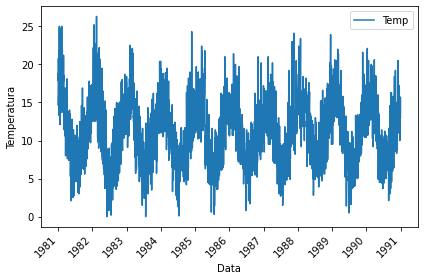

In [13]:
dados.plot()
plt.xticks(rotation=45)
plt.xlabel('Data')
plt.ylabel('Temperatura')
plt.tight_layout()

In [14]:
t_treino = dados[dados.index<'1990-01-01'].index.values
t_teste = dados[dados.index>='1990-01-01'].index.values
X_treino = dados[dados.index<'1990-01-01'].values
X_teste = dados[dados.index>='1990-01-01'].values

* Aplicando modelo autoregressivo

In [15]:
from statsmodels.tsa.api import ARMA

In [16]:
modelo = ARMA(X_treino, order=(2, 2))
resultado = modelo.fit()

* Coeficientes

In [17]:
print('Coefficients: %s' % resultado.params)

Coefficients: [11.44863996  1.23902809 -0.2446369  -0.64947082 -0.22653379]


* Fazendo predições

In [18]:
X_pred = resultado.predict(start=len(X_treino), end=len(X_treino)+len(X_teste)-1)

* Calculando erros

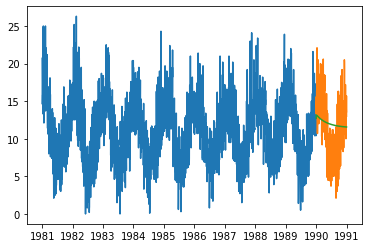

In [19]:
plt.plot(t_treino,X_treino)
plt.plot(t_teste,X_teste)
plt.plot(t_teste,X_pred)

* Calculando erros

In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
MSE = mean_squared_error(X_teste,X_pred)

In [22]:
RMSE = np.sqrt(MSE)

In [23]:
print("RMSE = {:0.2f}".format(RMSE))

RMSE = 3.70
